# Linear Regression with Height-Weight Data

In [1]:
# Importing Libraries and Pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('Height-Weight Data.csv') # loading data and making a datafram ,df
df

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [3]:
df.shape   # how many rows and columns has : (rows, columns)

(3501, 2)

In [4]:
df.isnull().sum()  # How many missing values are there in our datafram, df

Weight    0
Height    0
dtype: int64

In [5]:
# we can have all information about the df as follows:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  3501 non-null   float64
 1   Height  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


# Visualization

Text(0.5, 1.0, ' Weight vs Height Plot')

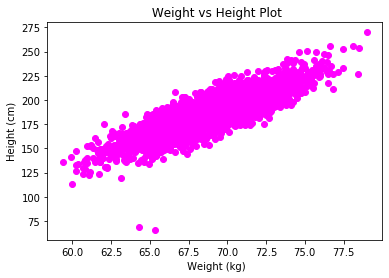

In [6]:
plt.scatter(df.Weight,df.Height,color='magenta') # scatter plot
plt.xlabel(" Weight (kg)")
plt.ylabel("Height (cm)")
plt.title(" Weight vs Height Plot")

# plt.savefig('image_1.png') # Saving image in png format, we can save pressing right click on it and save as..

# Basic Statistics

In [7]:
df.Weight.mean()

69.02441087268797

In [8]:
df.Height.mean()

186.89125797946284

In [9]:
df.mean()

Weight     69.024411
Height    186.891258
dtype: float64

In [10]:
df.median()

Weight     69.044211
Height    187.308370
dtype: float64

In [11]:
df.min()
#df.max()

Weight    59.38065
Height    65.78000
dtype: float64

In [12]:
#df.min()
df.max()

Weight     78.998742
Height    269.989698
dtype: float64

In [13]:
df.describe()

,Weight,Height
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


# How to access particular column from a dataframe

In [14]:
x=df[['Weight']] # We access the column Weight from df and assign it to the variable x,
                #Note : don't forgate the double square brakets and quotation marks around the column name 

In [15]:
x  # Here x is still a datafram

,Weight
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [16]:
y=df[['Height']]

In [17]:
y   # Here y is also a datafram

,Height
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
3496,185.649086
3497,210.198845
3498,202.429960
3499,144.277671


In [18]:
x.tail() # Last 5 rows , no argument means default values 5, tail means from the bottom side

,Weight
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021
3500,72.738970


In [19]:
y.head(3) # 1st 3 rows from the heading side

,Height
0,241.893563
1,162.310473
2,212.740856


We can drop a column from our df

In [20]:
x_drop=df.drop('Height',axis=1) # For column drop axis=1
x_drop

,Weight
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [21]:
y_drop=df.drop("Weight",axis=1)
y_drop

,Height
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
3496,185.649086
3497,210.198845
3498,202.429960
3499,144.277671


# Linear Regression Model Building

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
linear=LinearRegression()
linear.fit(x,y)  # training the data set
print("Coefficient= ",linear.coef_)
print("Intercept=",linear.intercept_)

Coefficient=  [[5.95843786]]
Intercept= [-224.38640537]


In [23]:
linear.predict([[69.5]])

array([[189.72502624]])

In [24]:
df['Prediction_Height']=linear.predict(x)
df

,Weight,Height,Prediction_Height
0,73.847017,241.893563,215.626457
1,68.781904,162.310473,185.446296
2,74.110105,212.740856,217.194053
3,71.730978,220.042470,203.018172
4,69.881796,206.349801,191.999933
...,...,...,...
3496,69.296830,185.649086,188.514450
3497,70.542201,210.198845,195.934919
3498,73.912549,202.429960,216.016926
3499,67.396021,144.277671,177.188597


In [26]:
linear.score(x,y) # Training Accuracy using whole data set

0.7323584758139252

In [41]:
mean_squared_error(df[['Height']],linear.predict(df[['Weight']]))

105.99179779708447

In [42]:
mean_absolute_error(df[['Height']],linear.predict(df[['Weight']]))

8.070234283451889

In [29]:
df

,Weight,Height,Prediction_Height
0,73.847017,241.893563,215.626457
1,68.781904,162.310473,185.446296
2,74.110105,212.740856,217.194053
3,71.730978,220.042470,203.018172
4,69.881796,206.349801,191.999933
...,...,...,...
3496,69.296830,185.649086,188.514450
3497,70.542201,210.198845,195.934919
3498,73.912549,202.429960,216.016926
3499,67.396021,144.277671,177.188597


Text(0.5, 1.0, ' Weight vs Height Plot with Best Fit Line')

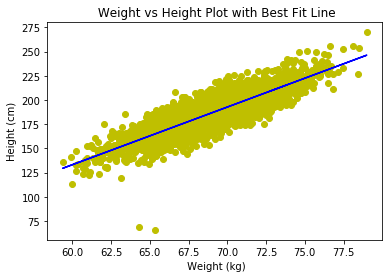

In [34]:
plt.scatter(df.Weight,df.Height,color='y') # scatter plot
plt.plot(df.Weight, df.Prediction_Height, color = "b")
plt.xlabel(" Weight (kg)")
plt.ylabel("Height (cm)")
plt.title(" Weight vs Height Plot with Best Fit Line")

    

In [43]:
df["mean_squared_error1"]=(df.Height-df.Prediction_Height)**2
df.mean_squared_error1.mean()

105.99179779708462